# Feature Imporatnce Analysis

In [45]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import configparser
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from src.utils import utils
from src.modelling import training as train



%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read data

In [20]:
proj_root = utils.get_proj_root()
config = configparser.ConfigParser(interpolation=None)
config.read(proj_root.joinpath('config/data_config.ini'))

final_year = int(config['year_limits']['end_year'])
training_data_rel_path = config['data_paths']['preprocessed_data_path']

training_data_path =  proj_root.joinpath(training_data_rel_path)
training_data_subset_path  = proj_root.joinpath(config['data_paths']['training_subset_path'])
testing_data_subset_path  = proj_root.joinpath(config['data_paths']['testing_subset_path'])

In [33]:

train_data =  pd.read_csv(training_data_subset_path)
test_data = pd.read_csv(testing_data_subset_path)
train_data.head()

,year,industry,symbol,currentRatio,currentRatio_percentage_change,quickRatio,quickRatio_percentage_change,daysOfSalesOutstanding,daysOfSalesOutstanding_percentage_change,daysOfInventoryOutstanding,...,priceEarningsToGrowthRatio_percentage_change,dividendYield,dividendYield_percentage_change,enterpriseValueMultiple,enterpriseValueMultiple_percentage_change,interestRate,interestRate_percentage_change,adjDividend,dps_growth,dps_change_next_year
0,2012,24,291,2.198387,-2.275946,1.385806,-0.090461,49.567449,3.987852,89.289449,...,6.939145,0.025377,-5.500411,8.692139,5.900833,0.14,40.000000,2.36,7.272727,0
1,2013,24,291,1.698186,-22.753086,1.012270,-26.954450,50.284895,1.447414,87.567366,...,21.913077,0.018089,-28.717392,12.326051,41.806877,0.11,-21.428571,2.54,7.627119,0
2,2014,24,291,1.961487,15.504836,1.127209,11.354593,48.611609,-3.327613,82.245394,...,-39.851336,0.020773,14.836058,13.065263,5.997151,0.09,-18.181818,3.42,34.645669,0
3,2015,24,291,1.543411,-21.314241,0.852768,-24.346986,50.082909,3.026645,83.473315,...,799.567847,0.027175,30.819267,12.318266,-5.717433,0.13,44.444444,4.10,19.883041,0
4,2016,24,291,1.885512,22.165260,1.136839,33.311664,53.242552,6.308824,82.149269,...,-84.149916,0.024801,-8.738086,13.479738,9.428861,0.40,207.692308,4.44,8.292683,0


In [34]:
test_data.head()

,year,industry,symbol,currentRatio,currentRatio_percentage_change,quickRatio,quickRatio_percentage_change,daysOfSalesOutstanding,daysOfSalesOutstanding_percentage_change,daysOfInventoryOutstanding,...,priceEarningsToGrowthRatio_percentage_change,dividendYield,dividendYield_percentage_change,enterpriseValueMultiple,enterpriseValueMultiple_percentage_change,interestRate,interestRate_percentage_change,adjDividend,dps_growth,dps_change_next_year
0,2021,24,291,1.704815,-9.559027,1.043165,-14.902195,48.109178,-9.839675,96.808992,...,67.702091,0.033253,-0.909598,15.729376,-12.979421,0.08,-78.947368,5.92,0.680272,0
1,2021,96,36,1.566500,-14.191051,1.131391,-21.328131,65.431631,-11.277742,73.344031,...,-112.480300,0.012391,-30.862468,19.078414,21.967224,0.08,-78.947368,1.06,8.163265,0
2,2021,63,4,1.849599,7.740228,1.277070,12.122625,54.968195,-18.741994,101.543130,...,-69.722616,0.012897,-2.300018,23.954222,-12.035499,0.08,-78.947368,1.80,25.000000,0
3,2021,31,3,0.793544,-5.912486,0.562795,-6.766883,64.800701,-7.822868,65.443082,...,-118.942510,0.038643,-10.545641,11.593723,-68.566197,0.08,-78.947368,5.20,10.169492,0
4,2021,49,6,1.251937,-10.687424,1.139527,-11.782243,70.266362,8.749094,0.000000,...,-45.271038,0.010467,-21.579906,21.516834,24.968678,0.08,-78.947368,3.61,10.060976,0


In [35]:
label_col_name = 'dps_change_next_year'
X_train, y_train = train.split_Xy(train_data, label_col_name=label_col_name)
X_test, y_test = train.split_Xy(test_data, label_col_name=label_col_name)

# Feature Importance

## check feature importance

In [38]:


randomForestModel = RandomForestClassifier(max_features=None)  # We want all features to be considered for each tree



randomForestModel.fit(X_train, y_train)
model_importance = randomForestModel.feature_importances_
importance_table = pd.DataFrame(columns=["Feature", "Importance"])  # Create an importance table to plot bar chart
featureNum = 0
for score in model_importance:
    # print("feature " + str(featureNum) + "'s importance score: " + str(score) + " (" + X_train.columns[featureNum] + ")")
    rowAdded = pd.DataFrame([[X_train.columns[featureNum], score]], columns=["Feature", "Importance"])
    importance_table = pd.concat([importance_table, rowAdded])
    featureNum = featureNum + 1
importance_table_sorted =  importance_table.sort_values('Importance', ascending=False).reset_index()


/tmp/ipykernel_2946/743104444.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  importance_table = pd.concat([importance_table, rowAdded])


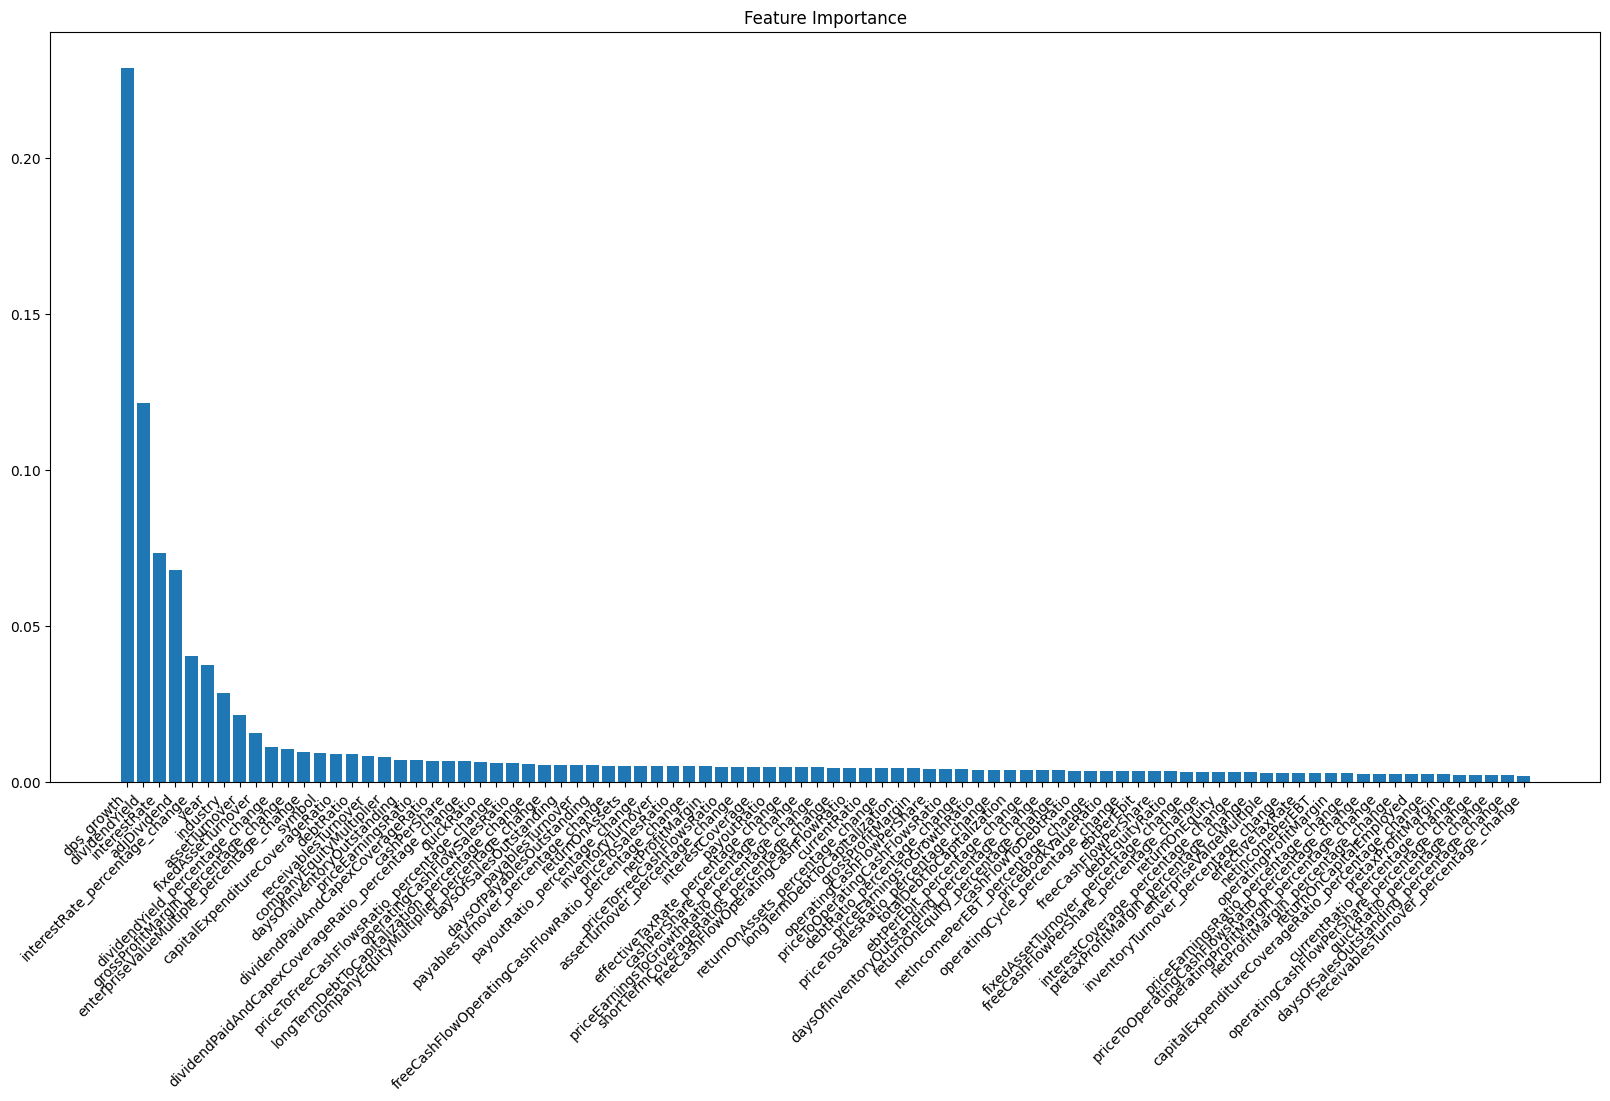

In [40]:
# Plot a bar chart to visualize feature importance
plt.figure(figsize=(20, 10))
# sns.barplot(data=importance_table, x="Feature", y="Importance")
plt.bar(importance_table_sorted['Feature'], importance_table_sorted['Importance'])
plt.title("Feature Importance")
plt.subplots_adjust(bottom=0.2, top=0.95)
plt.xticks(rotation=45, ha='right')
plt.show()

## Check model performance with feature importance

In [55]:
X_train_temp = X_train.copy()
X_test_temp = X_test.copy()

# Initialize the result dataframe
result_df = pd.DataFrame(columns=['Features_Removed', 'ROC_Score'])

# First, evaluate performance using all features
randomForestModel = RandomForestClassifier(max_features=None)
randomForestModel.fit(X_train_temp, y_train)
# Predict probabilities on test data
y_pred_probs = randomForestModel.predict_proba(X_test_temp)[:, 1]
# Compute ROC score
roc_score = roc_auc_score(y_test, y_pred_probs)
# Append the initial result to the result dataframe
new_row = pd.DataFrame({'Features_Removed': ['None'], 'ROC_Score': [roc_score]})
result_df = pd.concat([result_df, new_row])
# result_df = result_df.append({'Features_Removed': 'None', 'ROC_Score': roc_score}, ignore_index=True)
print(f"Feature_Removed: None, Number of features used: {len(X_train_temp.columns)}, ROC_AUC_Score: {roc_score}")

# Sort importance_table by Importance in ascending order to start with the least important
# importance_table_sorted = importance_table.sort_values('Importance')

# Loop through features, starting from the least important
for index, row in importance_table_sorted.iterrows():
    # Drop the feature from training and test data
    X_train_temp = X_train_temp.drop(columns=[row['Feature']])
    X_test_temp = X_test_temp.drop(columns=[row['Feature']])
    # Train a random forest model
    randomForestModel = RandomForestClassifier(max_features=None)
    randomForestModel.fit(X_train_temp, y_train)
    # Predict probabilities on test data
    y_pred_probs = randomForestModel.predict_proba(X_test_temp)[:, 1]
    # Compute ROC score
    roc_score = roc_auc_score(y_test, y_pred_probs)
    # Append the result to the result dataframe
    new_row = pd.DataFrame({'Features_Removed': [row['Feature']], 'ROC_Score': [roc_score]})
    result_df = pd.concat([result_df, new_row])
    # result_df = result_df.append({'Features_Removed': row['Feature'], 'ROC_Score': roc_score}, ignore_index=True)
    print(
        f"Feature_Removed: {row['Feature']}, Number of features used: {len(X_train_temp.columns)}, ROC_AUC_Score: {roc_score}")
    # If only one feature left, break the loop
    if X_train_temp.shape[1] == 1:
        break

/tmp/ipykernel_2946/4085514517.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row])


Feature_Removed: None, Number of features used: 88, ROC_AUC_Score: 0.8540566959921799
Feature_Removed: dps_growth, Number of features used: 87, ROC_AUC_Score: 0.8336265884652981
Feature_Removed: dividendYield, Number of features used: 86, ROC_AUC_Score: 0.747605083088954
Feature_Removed: interestRate, Number of features used: 85, ROC_AUC_Score: 0.6489736070381231
Feature_Removed: adjDividend, Number of features used: 84, ROC_AUC_Score: 0.7100684261974585
Feature_Removed: interestRate_percentage_change, Number of features used: 83, ROC_AUC_Score: 0.7602150537634409
Feature_Removed: year, Number of features used: 82, ROC_AUC_Score: 0.7617790811339199
Feature_Removed: industry, Number of features used: 81, ROC_AUC_Score: 0.7949169110459433
Feature_Removed: assetTurnover, Number of features used: 80, ROC_AUC_Score: 0.773998044965787
Feature_Removed: fixedAssetTurnover, Number of features used: 79, ROC_AUC_Score: 0.7834799608993157
Feature_Removed: dividendYield_percentage_change, Number of

In [ ]:
utils.save_value(result_df, )

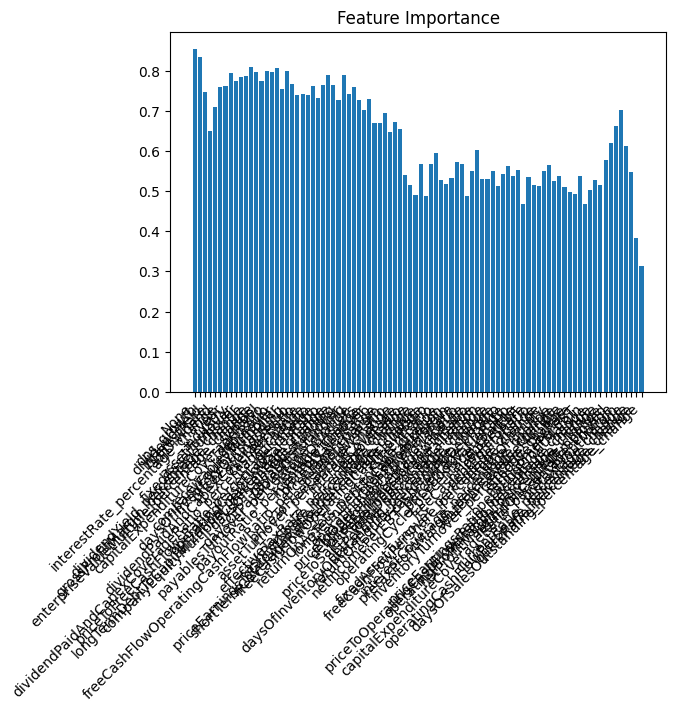

In [63]:
result_df

# fig, ax = plt.subplots()
plt.close()

plt.bar(result_df['Features_Removed'], result_df['ROC_Score'])

plt.title("Feature Importance")
plt.subplots_adjust(bottom=0.2, top=0.95)
plt.xticks(rotation=45, ha='right', )
plt.show()

In [14]:
y_train.isna().sum()

3585

In [15]:
3838-253

3585